
Analyzing Numerical Column: median_house_value
Mean: 206855.81690891474
Median: 179700.0
Mode: 500001.0
Standard Deviation: 115395.6158744132
Variance: 13316148163.035124
Range: 485002.0


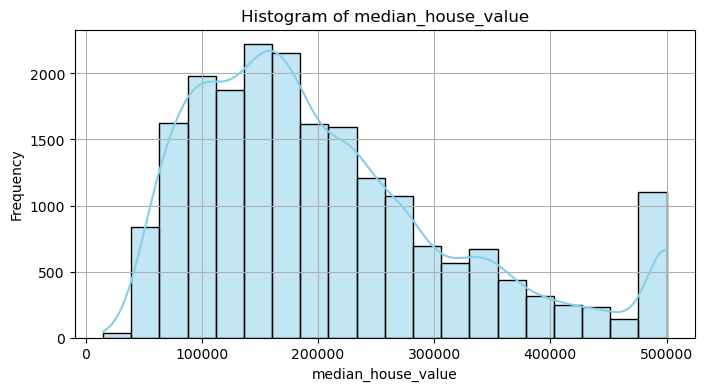

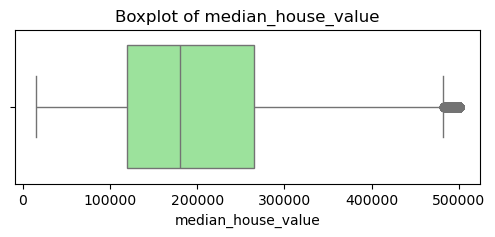


Number of outliers detected in 'median_house_value': 1071
       median_house_value
89               500001.0
140              483300.0
459              500001.0
489              489600.0
493              500001.0
...                   ...
20422            500001.0
20426            500001.0
20427            500001.0
20436            500001.0
20443            500001.0

[1071 rows x 1 columns]

Analyzing Categorical Column: ocean_proximity
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


C:\Users\faizr\AppData\Local\Temp\ipykernel_27304\3716301400.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cat_col, data=df, palette='deep')


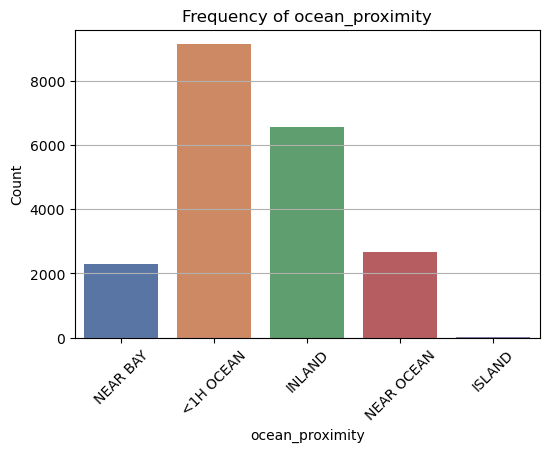

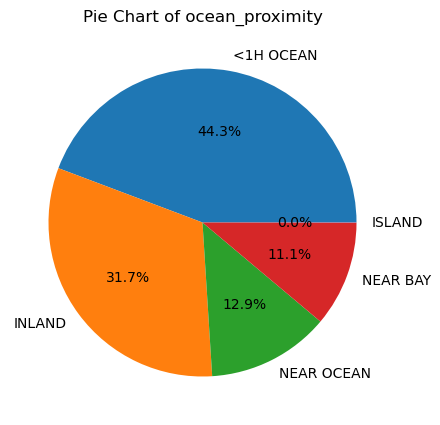

In [25]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\faizr\Downloads\Datasets\housing.csv")

num_col = 'median_house_value'
print(f"\nAnalyzing Numerical Column: {num_col}")

mean_val = df[num_col].mean()
median_val = df[num_col].median()
mode_val = df[num_col].mode().values[0]
std_dev = df[num_col].std()
variance = df[num_col].var()
value_range = df[num_col].max() - df[num_col].min()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {value_range}")

plt.figure(figsize=(8, 4))
sns.histplot(df[num_col], kde=True, bins=20, color='skyblue')
plt.title(f'Histogram of {num_col}')
plt.xlabel(num_col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=df[num_col], color='lightgreen')
plt.title(f'Boxplot of {num_col}')
plt.show()

Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]

print(f"\nNumber of outliers detected in '{num_col}': {len(outliers)}")
print(outliers[[num_col]])

cat_col = 'ocean_proximity'
print(f"\nAnalyzing Categorical Column: {cat_col}")

cat_counts = df[cat_col].value_counts()
print(cat_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x=cat_col, data=df, palette='deep')
plt.title(f'Frequency of {cat_col}')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 5))
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%')
plt.title(f'Pie Chart of {cat_col}')
plt.show()


First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


C:\Users\faizr\AppData\Local\Temp\ipykernel_27304\3511580061.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x_col, y=y_col, palette='deep')


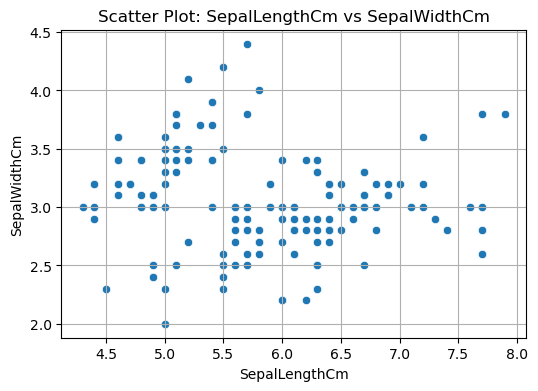


Pearson Correlation between SepalLengthCm and SepalWidthCm: -0.109

Covariance Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       0.685694     -0.039268       1.273682      0.516904
SepalWidthCm       -0.039268      0.188004      -0.321713     -0.117981
PetalLengthCm       1.273682     -0.321713       3.113179      1.296387
PetalWidthCm        0.516904     -0.117981       1.296387      0.582414

Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


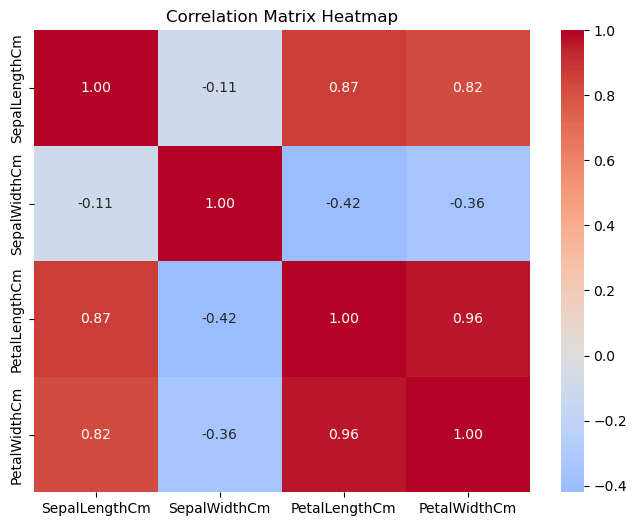

In [33]:
#2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\faizr\Downloads\Datasets\Iris.csv")

print("First 5 rows of the dataset:")
print(df.head())

x_col = 'SepalLengthCm'
y_col = 'SepalWidthCm'

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=x_col, y=y_col, palette='deep')
plt.title(f'Scatter Plot: {x_col} vs {y_col}')
plt.grid(True)
plt.show()

pearson_corr = df[x_col].corr(df[y_col])
print(f"\nPearson Correlation between {x_col} and {y_col}: {pearson_corr:.3f}")

cov_matrix = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].cov()
print("\nCovariance Matrix:")
print(cov_matrix)

corr_matrix = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


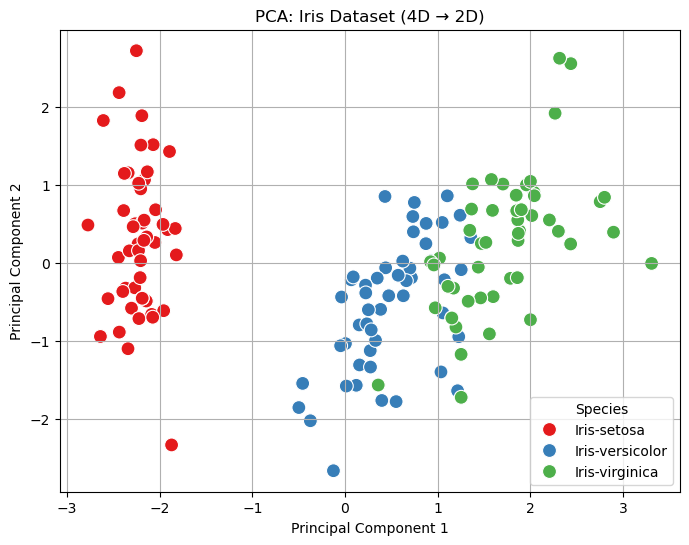


Explained Variance Ratio:
PC1: 72.77%
PC2: 23.03%


In [37]:
#3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\Users\faizr\Downloads\Datasets\Iris.csv")
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[features]
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='Set1', s=100)
plt.title('PCA: Iris Dataset (4D → 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("\nExplained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.2%}")


In [39]:
#4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

df = pd.read_csv(r"C:\Users\faizr\Downloads\Datasets\Iris.csv")

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = LabelEncoder().fit_transform(df['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=False):
    results = {}
    for k in k_values:
        weights = 'distance' if weighted else 'uniform'
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[k] = {'accuracy': accuracy, 'f1_score': f1}
    return results

k_values = [1, 3, 5]

print("Regular k-NN Results:")
regular_results = cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=False)
for k, metrics in regular_results.items():
    print(f"k={k}: Accuracy={metrics['accuracy']:.2f}, F1-Score={metrics['f1_score']:.2f}")

print("\nWeighted k-NN Results:")
weighted_results = cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=True)
for k, metrics in weighted_results.items():
    print(f"k={k}: Accuracy={metrics['accuracy']:.2f}, F1-Score={metrics['f1_score']:.2f}")

print("\nComparison of Regular k-NN and Weighted k-NN:")
for k in k_values:
    print(f"k={k}: Regular={regular_results[k]['accuracy']:.2f}, Weighted={weighted_results[k]['accuracy']:.2f}")


Regular k-NN Results:
k=1: Accuracy=1.00, F1-Score=1.00
k=3: Accuracy=1.00, F1-Score=1.00
k=5: Accuracy=1.00, F1-Score=1.00

Weighted k-NN Results:
k=1: Accuracy=1.00, F1-Score=1.00
k=3: Accuracy=1.00, F1-Score=1.00
k=5: Accuracy=1.00, F1-Score=1.00

Comparison of Regular k-NN and Weighted k-NN:
k=1: Regular=1.00, Weighted=1.00
k=3: Regular=1.00, Weighted=1.00
k=5: Regular=1.00, Weighted=1.00


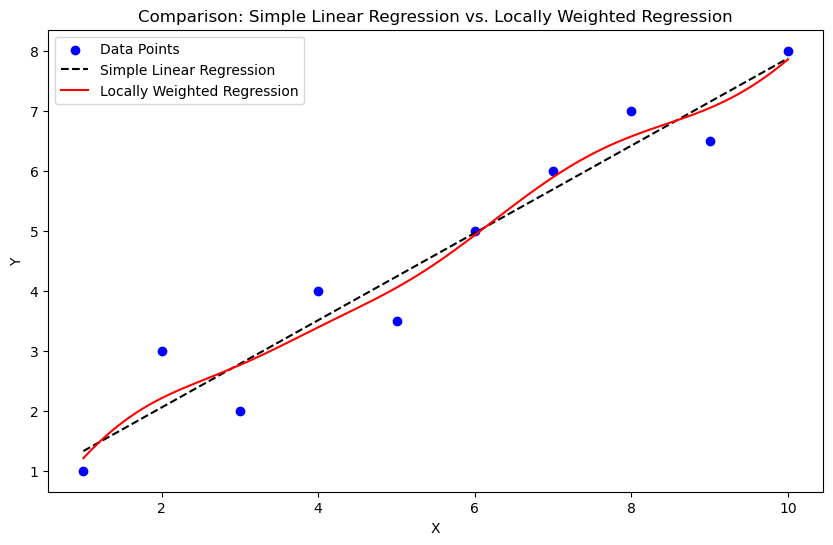

In [41]:
#6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]
    x_query_b = np.array([1, x_query])
    W = np.diag(gaussian_kernel(X, x_query, tau))
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    return x_query_b @ theta

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])
X_query = np.linspace(1, 10, 100)
tau = 1.0
y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])

lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')
plt.plot(X_query, y_lwr, color='red', label='Locally Weighted Regression')
plt.title("Comparison: Simple Linear Regression vs. Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


R² Score: 0.3708
MSE: 46.14
R² Score: 0.6654
MSE: 22.64


C:\Users\faizr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


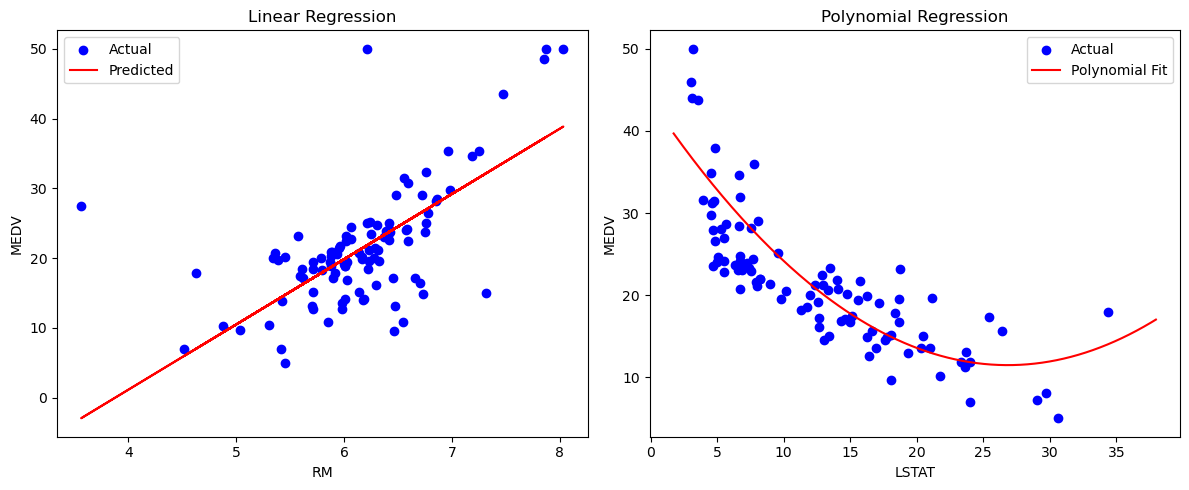

In [43]:
#7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\faizr\Downloads\Datasets\Boston housing dataset.csv")

X = df[['RM']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Linear Regression')
plt.legend()
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

df_poly = df.dropna(subset=['LSTAT', 'MEDV'])
X_poly = df_poly[['LSTAT']]
y_poly = df_poly['MEDV']
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly_tr = poly.fit_transform(X_train_poly)
X_test_poly_tr = poly.transform(X_test_poly)

model = LinearRegression()
model.fit(X_train_poly_tr, y_train_poly)
y_pred_poly = model.predict(X_test_poly_tr)

print(f"R² Score: {r2_score(y_test_poly, y_pred_poly):.4f}")
print(f"MSE: {mean_squared_error(y_test_poly, y_pred_poly):.2f}")

plt.subplot(1, 2, 2)
plt.scatter(X_test_poly, y_test_poly, color='blue', label='Actual')
x_range = np.linspace(X_poly.min(), X_poly.max(), 200).reshape(-1, 1)
plt.plot(x_range, model.predict(poly.transform(x_range)), color='red', label='Polynomial Fit')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Polynomial Regression')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\faizr\AppData\Local\Temp\ipykernel_27304\3834113737.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


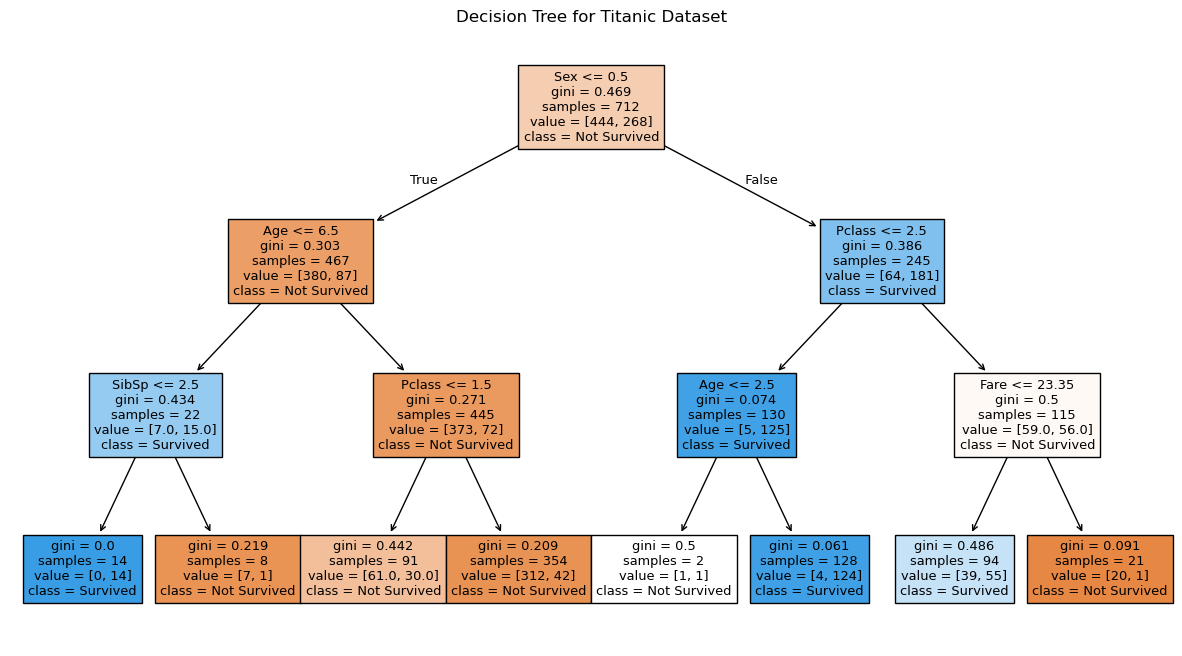

Model Evaluation Metrics:
Accuracy  : 0.7989
Precision : 0.7969
Recall    : 0.6892
F1 Score  : 0.7391


In [45]:
#8
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\faizr\Downloads\Datasets\Titanic-Dataset.csv")
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")


In [47]:
#9
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\faizr\Downloads\Datasets\Iris.csv")
df = df.drop(columns=["Id"])
X = df.drop(columns=["Species"])
y = df["Species"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the Naive Bayes classifier: {accuracy}")

print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


The accuracy of the Naive Bayes classifier: 1.0

Classification report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\faizr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


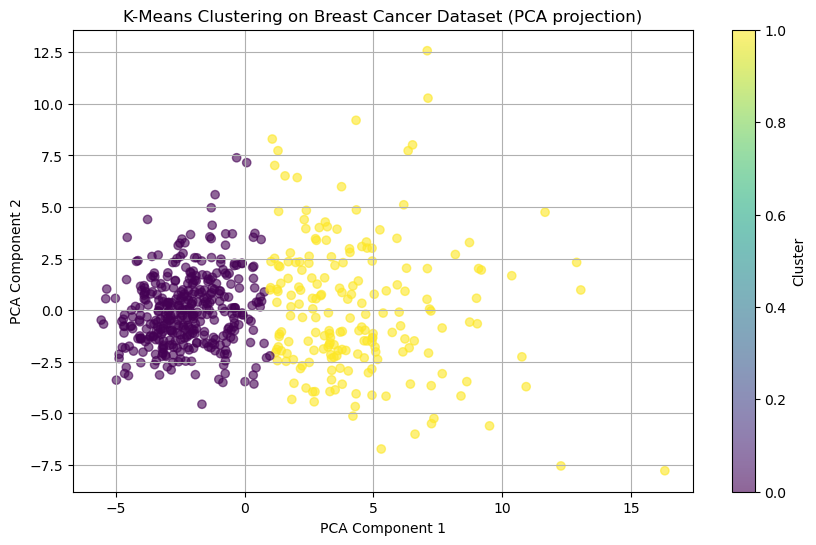

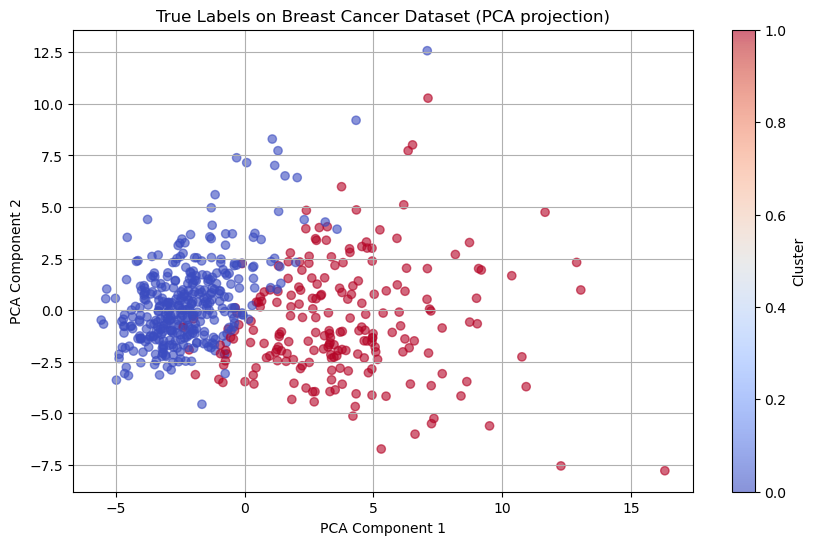

Clustering Evaluation (confusion matrix vs. true labels):
[[339  18]
 [ 36 176]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       357
           1       0.91      0.83      0.87       212

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.90       569



In [49]:
#10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\faizr\Downloads\Datasets\Breast Cancer Dataset.csv")
df = df.drop(columns=["id"])
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering on Breast Cancer Dataset (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='coolwarm', alpha=0.6)
plt.title("True Labels on Breast Cancer Dataset (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

print("Clustering Evaluation (confusion matrix vs. true labels):")
print(confusion_matrix(y_encoded, labels))
print(classification_report(y_encoded, labels))
